In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy import integrate
from scipy.interpolate import interp1d
import sys
sys.path.append('../series_alignment')
from scipy.spatial.transform import Rotation as R
#from apdist.distances import AmplitudePhaseDistance
from scipy.signal import find_peaks
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.optimize import nnls
import series_alignment

## Load Experimental Data

In [2]:
#Load data for bilayer 
#path = '../Data/SAXS/Kinetics/ESAXS_Sub/'
path = '../Data/SAXS/Kinetics_Sq/'
filenames = sorted(os.listdir(path))

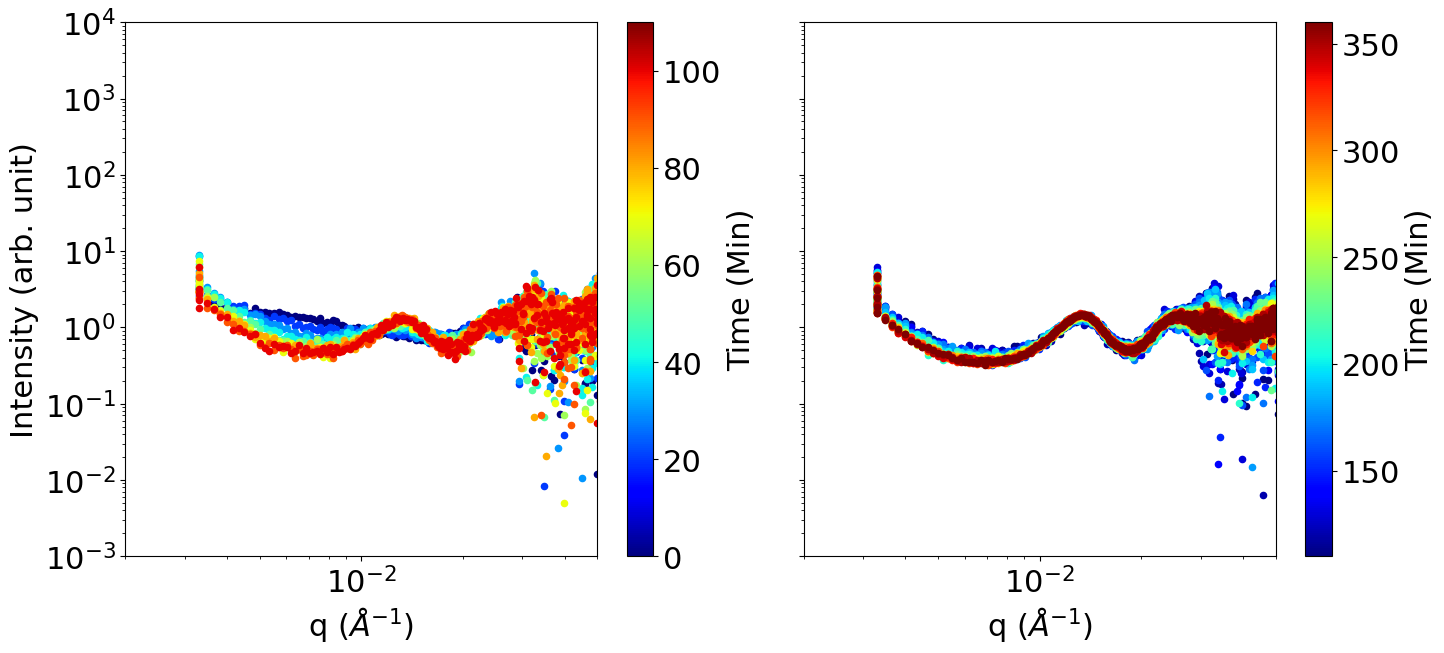

In [3]:
plt.rcParams.update({'font.size': 22})

times = np.linspace(0, 360, 37)
times = np.delete(times, 1)


# Normalize times for colormap
norm = colors.Normalize(vmin=np.min(times), vmax=times[10])
cmap = cm.jet
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
# Plotting
fig, ax = plt.subplots(figsize=(15, 7), ncols=2)

for i in range(0, 10):
    #data = read_DAT_file(path + filenames[i])
    data = np.load(path + filenames[i])
    if i == 0:
        ax[0].scatter(data[5:,0], data[5:,1], color=sm.to_rgba(times[i]), s = 20)
    else:
        ax[0].scatter(data[10:,0], data[10:,1], color=sm.to_rgba(times[i]), s = 20)


ax[0].set_xlabel('q ($\\AA$$^{-1}$)')
ax[0].set_ylabel('Intensity (arb. unit)')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
#ax.grid(True, which='both', ls='--', lw=0.5)

# Add vertical colorbar
cbar = fig.colorbar(sm, ax=ax[0], orientation='vertical')
cbar.set_label('Time (Min)')

# Normalize times for colormap
norm = colors.Normalize(vmin=times[10], vmax=np.max(times))
cmap = cm.jet
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
# Plotting
for i in range(10, len(filenames)):
    #data = read_DAT_file(path + filenames[i])
    data = np.load(path + filenames[i])
    ax[1].scatter(data[10:,0], data[10:,1], color=sm.to_rgba(times[i]), s = 20)
ax[1].set_xlabel('q ($\\AA$$^{-1}$)')
#ax[1].set_ylabel('Intensity (a.u.)')
ax[1].set_yticks([])
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax.grid(True, which='both', ls='--', lw=0.5)
ax[1].set_yticklabels([])
ax[1].set_xlim([0.002, 0.05])
ax[1].set_ylim([1e-3, 1e4])
ax[0].set_xlim([0.002, 0.05])
ax[0].set_ylim([1e-3, 1e4])
# Add vertical colorbar
cbar = fig.colorbar(sm, ax=ax[1], orientation='vertical')
cbar.set_label('Time (Min)')
plt.tight_layout()
#plt.savefig('../Figures/Kinetics_Experiment.png', dpi=600, bbox_inches="tight")
plt.show()

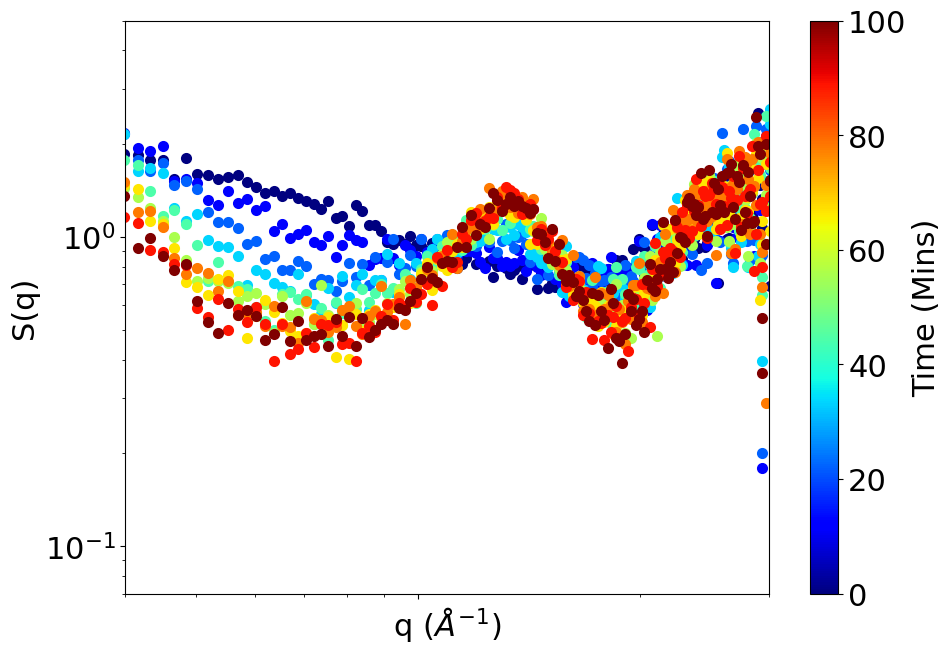

In [4]:
path = '../Data/SAXS/Kinetics_Sq/'
filenames = sorted(os.listdir(path))
plt.rcParams.update({'font.size': 22})
norm = colors.Normalize(vmin=0, vmax=100)
cmap = cm.jet
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
times = np.linspace(0,100, 10)
sim_saxs_data = []
fig, ax = plt.subplots(figsize=(10,7))
for i in range(10):
    data = np.load(path + filenames[i])
    sim_saxs_data.append(data)
    ax.scatter(data[:,0], data[:,1], linewidth = 2, color=sm.to_rgba(times[i]))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('S(q)')
    ax.set_xlabel('q ($\\AA^{-1}$)')
    ax.set_xlim([0.004, 0.03])
    ax.set_ylim([7e-2, 5e0])
    ax.tick_params(
    axis="x",
    which="both",
    labelbottom=False)  # hides the numbers)
    ax.set_xticks([1e-2])

cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Time (Mins)')
plt.tight_layout()
#plt.savefig('../Figures/SAXS_exp_scatter.png', dpi=600, bbox_inches="tight")


In [5]:
exp_saxs_data = []
for i in range(0, 10):
    #data = read_DAT_file(path + filenames[i])
    data = np.load(path + filenames[i])
    exp_saxs_data.append(data)

## Load Simulated Data

In [6]:
file_path = '../Data/Simulations/Simulation_File_8/Optimization_Results/Sample_0/Density_0.005_U_0_46.95_r0_2.25_n_1.0_m_20.89/scattering_data_mcdfm_sq/'
filenames = sorted(os.listdir(file_path))

sim_saxs_data = []
for i in range(len(filenames)):
    saxs_data = np.load(file_path + filenames[i])
    sim_saxs_data.append(saxs_data)

In [7]:
len(filenames)

98

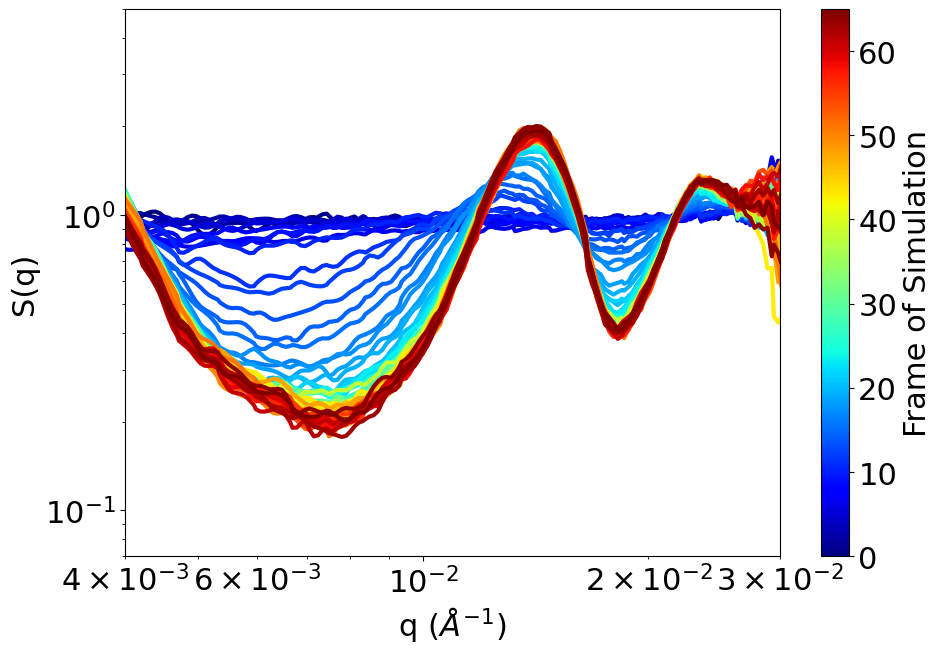

In [8]:
norm = colors.Normalize(vmin=0, vmax=65)
cmap = cm.jet
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
times = np.linspace(0,65, 65)

sim_saxs_data = []
fig, ax = plt.subplots(figsize=(10,7))
#for i in range(len(filenames)):
for i in range(65):
    data = np.load(file_path + filenames[i])
    sim_saxs_data.append(data)
    ax.plot(data[:,0], data[:,1], linewidth = 3, color=sm.to_rgba(times[i]))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('S(q)')
    ax.set_xlabel('q ($\\AA^{-1}$)')
    ax.set_xlim([0.004, 0.03])
    ax.set_ylim([7e-2, 5e0])
    #ax.tick_params(
    #axis="x",
    #which="both",
    #labelbottom=False)  # hides the numbers)
    #ax.set_xticks([1e-2])

cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Frame of Simulation')
plt.tight_layout()
#plt.savefig('../Figures/SAXS_simulated.png', dpi=600, bbox_inches="tight")


## Prepare Data

In [9]:
score_matrix = series_alignment.create_distance_matrix(exp_saxs_data, sim_saxs_data, 'log_mse', q_range=(0.004, 0.02))
#score_matrix = series_distance.create_distance_matrix(exp_saxs_data, sim_saxs_data, 'peak_position', q_range=(0.004, 0.02))

In [10]:
idx_cols, total_dist = series_alignment.align_monotone_min(score_matrix)
total_dist

0.12218821149897553

## Compare Curves by Plotting

In [13]:
def plot_compared_curves(exp_saxs_data, sim_saxs_data, idx_sim, q_range=None):
    norm = colors.Normalize(vmin=0, vmax=100)
    cmap = cm.jet
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    times = np.linspace(0,100,len(exp_saxs_data))
    for i in range(len(idx_sim)):
        fig, ax = plt.subplots(figsize=(10,7))
        d_ap, q_ref, I_exp, I_sim = series_distance.compare_curves(exp_saxs_data[i], sim_saxs_data[idx_sim[i]], q_range=q_range)
        ax.plot(q_ref, I_exp, linewidth = 3, color=sm.to_rgba(times[i]))
        ax.plot(q_ref, I_sim, linewidth = 3, color='k', label = 'Simulated Index: ' + str(idx_sim[i]))
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylabel('Intensity (arb. unit)')
        ax.set_xlabel('q ($\\AA^{-1}$)')
        #ax.set_xlim([0.004, 0.03])
        #plt.legend()
        #cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
        #cbar.set_label('Frame of Simulation (normalized)')
        plt.tight_layout()

def plot_compared_curves_single(exp_saxs_data, sim_saxs_data, idx_sim, q_range=None):
    norm = colors.Normalize(vmin=0, vmax=100)
    cmap = cm.jet
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    times = np.linspace(0,100,len(exp_saxs_data))
    fig, ax = plt.subplots(figsize=(10,7))
    for i in range(len(idx_sim)):
        d_ap, q_ref, I_exp, I_sim = series_aligment.compare_curves(exp_saxs_data[i], sim_saxs_data[idx_sim[i]], 'peak_position', q_range=q_range)
        ax.plot(q_ref, I_exp*i**7, linewidth = 3, color=sm.to_rgba(times[i]))
        ax.plot(q_ref, I_sim*i**7, linewidth = 3, color='k', label = 'Simulated Index: ' + str(idx_sim[i]))
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylabel('Intensity (arb. unit)')
        ax.set_xlabel('q ($\\AA^{-1}$)')
        #ax.set_xlim([0.004, 0.03])
        #plt.legend()
        #cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
        #cbar.set_label('Frame of Simulation (normalized)')
        plt.tight_layout()

def plot_compared_curves_grid(exp_saxs_data, sim_saxs_data, idx_sim, q_range=None):
    norm = colors.Normalize(vmin=0, vmax=100)
    cmap = cm.jet
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    times = np.linspace(0,100,len(exp_saxs_data))
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('Intensity (arb. unit)', labelpad = 0)
    plt.xlabel('q ($\\AA^{-1}$)', labelpad=0)
    gs = fig.add_gridspec(3, 3, hspace=0, wspace=0)
    ax = gs.subplots(sharex='col', sharey='row')
    plt.plot(0,0,linewidth = 3, color='k', label='Simulated Data')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 3.02), ncol=3, fontsize=14)
    #for i in range(len(idx_sim)):
    i = 0 
    for row in range(0, 3):
        for col in range(0, 3):
            axs = ax[row, col]
            axs.tick_params(
            axis="x",
            which="both",
            labelbottom=False)  # hides the numbers)
            i = i + 1
            d_ap, q_ref, I_exp, I_sim = series_alignment.compare_curves(exp_saxs_data[i], sim_saxs_data[idx_sim[i]], 'peak_position', q_range=q_range)
            axs.scatter(q_ref, I_exp, linewidth = 0.3, color=sm.to_rgba(times[i]))
            axs.plot(q_ref, I_sim, linewidth = 3, color='k', label = 'Simulated Index: ' + str(idx_sim[i]))

            #axs.set_yscale('log')
            axs.set_xscale('log')
            axs.set_xlim([0.004, 0.03])
            #axs.set_ylim([0.1, 10])
            axs.set_ylim([0, 2.5])
            axs.set_yticks([])
            axs.set_xticks([])
            axs.set_xticklabels([])
            # ax.set_ylabel('Intensity (arb. unit)')
            #axs.set_xlabel('q ($\\AA^{-1}$)')

            #plt.legend()
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Experimental Data Time (Mins)')
    #plt.savefig('../Figures/SAXS_matching.png', dpi=600, bbox_inches="tight")


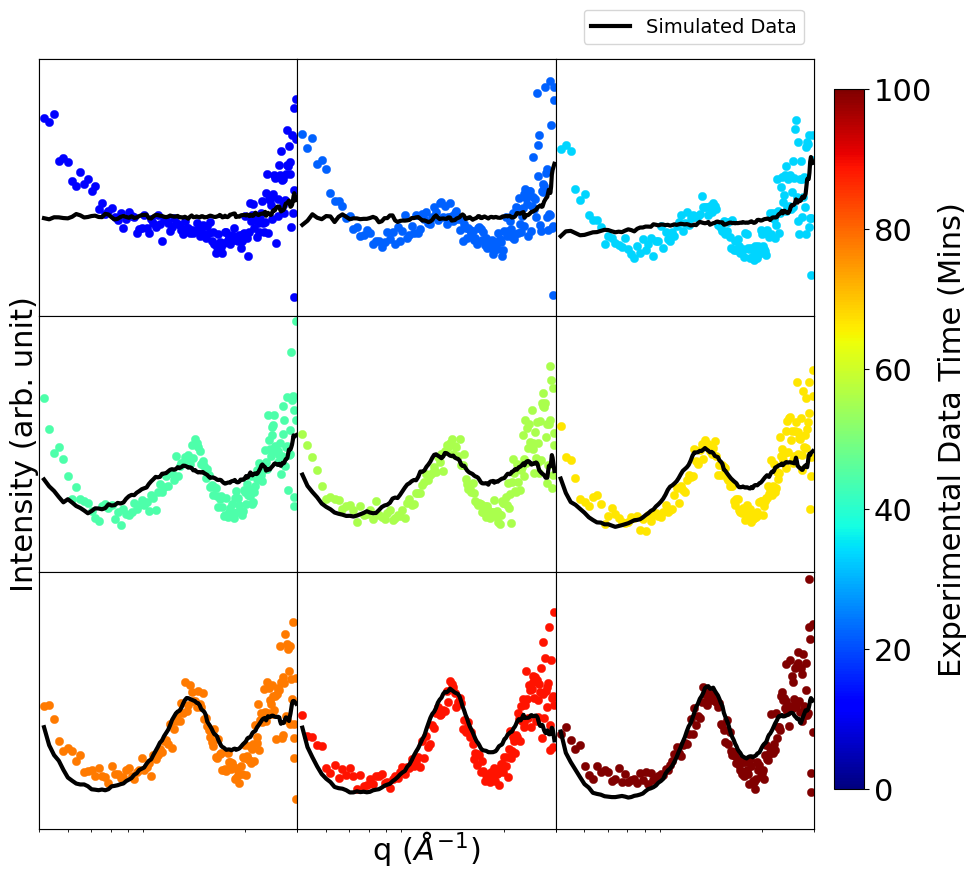

In [14]:
plot_compared_curves_grid(exp_saxs_data, sim_saxs_data, idx_cols, q_range=(0.004, 0.03))

In [15]:
idx_cols

[np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(6),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 16]

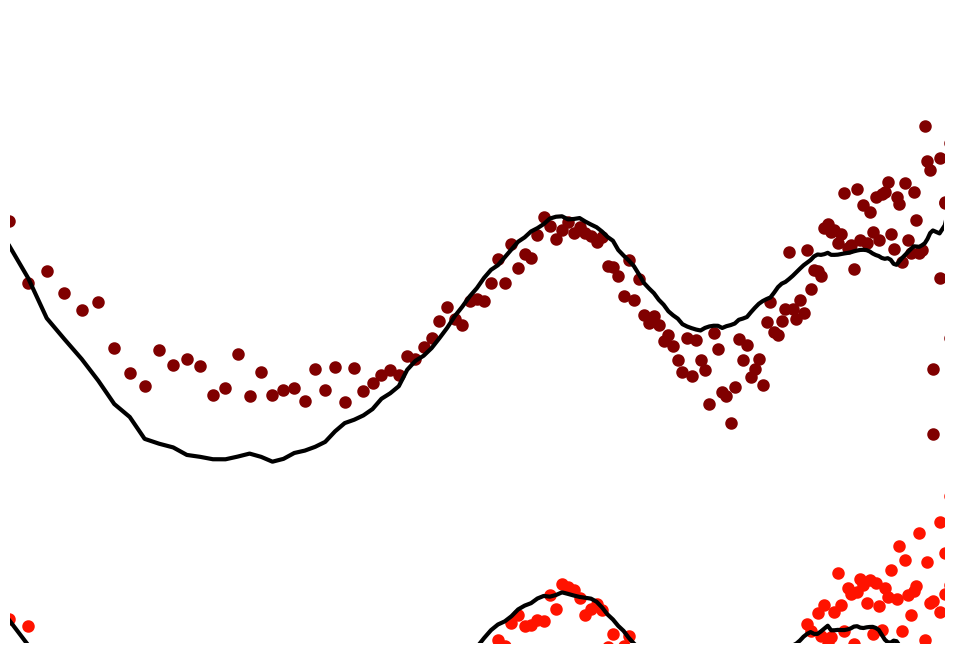

In [ ]:
def plot_compared_curves_single(exp_saxs_data, sim_saxs_data, idx_sim, q_range=None):
    spacing_factor = 10  # try 2, 5, or 10
    norm = colors.Normalize(vmin=0, vmax=100)
    cmap = cm.jet
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    times = np.linspace(0,100,len(exp_saxs_data))
    fig, ax = plt.subplots(figsize=(10,7))
    #for i in range(len(idx_sim)):
    for i in range(7,10):    
        d_ap, q_ref, I_exp, I_sim = series_alignment.compare_curves(
            exp_saxs_data[i],
            sim_saxs_data[idx_sim[i]],
            'peak_position',
            q_range=q_range
        )

        offset = spacing_factor ** i

        ax.scatter(
            q_ref,
            I_exp * offset,
            linewidth=3,
            color=sm.to_rgba(times[i])
        )
        
        ax.plot(
            q_ref,
            I_sim * offset,
            linewidth=3,
            color='k'
        )
        
        #ax.plot(q_ref, I_sim*i**3, linewidth = 3, color='k', label = 'Simulated Index: ' + str(idx_sim[i]))
        
        
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylabel('Intensity (arb. unit)')
        ax.set_xlabel('q ($\\AA^{-1}$)')
        ax.set_xlim([0.004, 0.03])
        plt.axis('off')
        ax.set_ylim(1e8, 5e9)
        #plt.legend()
        #cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
        #cbar.set_label('Frame of Simulation (normalized)')
        plt.tight_layout()
        #plt.savefig('../Figures/SAXS_matching_single_curves3.png', dpi=600, bbox_inches="tight")

plot_compared_curves_single(exp_saxs_data, sim_saxs_data, idx_cols)